In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import statsmodels.api as sm
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
cdn_df = pd.read_csv("C:/Users/owner/Desktop/cpsc599/project/46100057.csv")
#data fromm: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=4610005701 "Number of residential properties sold and sale price by property type and period of construction"

us_df = pd.read_csv("C:/Users/owner/Desktop/cpsc599/project/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
us_rental_df = pd.read_csv("C:/Users/owner/Desktop/cpsc599/project/Metro_ZORI_AllHomesPlusMultifamily_SSA-rental.csv")
#cdn_rental_df = pd.read_csv("C:/Users/owner/Desktop/cpsc599/project/34100133-rent.csv")
cdn_df

,REF_DATE,GEO,DGUID,Sale type,Property characteristics,Estimates,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,Nova Scotia,2016A000212,"Total, all sale types","Total, all property types",Number of properties sold,Number,223,units,0,v1278317597,1.1.1.1,25390.0,NaN,NaN,NaN,0
1,2018,Nova Scotia,2016A000212,"Total, all sale types","Total, all property types","Sale type, percentage",Percent,239,units,0,v1278317598,1.1.1.2,100.0,NaN,NaN,NaN,1
2,2018,Nova Scotia,2016A000212,"Total, all sale types","Total, all property types","Property characteristics, percentage",Percent,239,units,0,v1278317599,1.1.1.3,100.0,NaN,NaN,NaN,1
3,2018,Nova Scotia,2016A000212,"Total, all sale types","Total, all property types",Average number of buyers,Number,223,units,0,v1278317600,1.1.1.4,1.6,NaN,NaN,NaN,1
4,2018,Nova Scotia,2016A000212,"Total, all sale types","Total, all property types",Average sale price,Dollars,81,units,0,v1278317601,1.1.1.5,200000.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15997,2018,Outside of census metropolitan and agglomerati...,NaN,Market sale,Period of construction not applicable (vacant ...,"Sale type, percentage",Percent,239,units,0,v1278333594,44.3.21.2,69.2,NaN,NaN,NaN,1
15998,2018,Outside of census metropolitan and agglomerati...,NaN,Market sale,Period of construction not applicable (vacant ...,"Property characteristics, percentage",Percent,239,units,0,v1278333595,44.3.21.3,16.8,NaN,NaN,NaN,1
15999,2018,Outside of census metropolitan and agglomerati...,NaN,Market sale,Period of construction not applicable (vacant ...,Average number of buyers,Number,223,units,0,v1278333596,44.3.21.4,1.6,NaN,NaN,NaN,1
16000,2018,Outside of census metropolitan and agglomerati...,NaN,Market sale,Period of construction not applicable (vacant ...,Average sale price,Dollars,81,units,0,v1278333597,44.3.21.5,220000.0,NaN,NaN,NaN,0


In [4]:
print("Canadian df ",cdn_df.shape)
#this is the number of rows and columns 

Canadian df  (16002, 17)


It looks like the columns have price changes over time as a time series based df

In [5]:
#let's get a look at what the values in the column for the Caandian dataset for region to see what the breakdown might look like 
#for the makeup of houses are around the country
cdn_df.groupby('GEO')['GEO'].agg('count')

GEO
Abbotsford - Mission, Census metropolitan area (CMA)                             360
Bathurst, Census agglomeration (CA)                                              378
British Columbia                                                                 360
Campbell River, Census agglomeration (CA)                                        360
Campbellton (New Brunswick part), Census agglomeration (CA) – provincial part    378
Cape Breton, Census agglomeration (CA)                                           360
Chilliwack, Census agglomeration (CA)                                            360
Courtenay, Census agglomeration (CA)                                             360
Cranbrook, Census agglomeration (CA)                                             360
Dawson Creek, Census agglomeration (CA)                                          360
Duncan, Census agglomeration (CA)                                                360
Edmundston, Census agglomeration (CA)                        

make a pie graph or something out of this

In [6]:
cdn_df.groupby('GEO')['GEO'].agg('count').unique()

array([360, 378], dtype=int64)

In [7]:
#so there are 378 districts - we need to encode these
#also note that there is also only one ref date so delete this
cdn_df.groupby('REF_DATE')['REF_DATE'].agg('count').shape

(1,)

In [8]:
cdn_df2 = cdn_df.drop(['DGUID', 'TERMINATED','SYMBOL', 'STATUS', 'VECTOR', 'SCALAR_ID', 'REF_DATE', 'SCALAR_FACTOR', 'DECIMALS'], axis='columns')
cdn_df2.tail()

,GEO,Sale type,Property characteristics,Estimates,UOM,UOM_ID,COORDINATE,VALUE
15997,Outside of census metropolitan and agglomerati...,Market sale,Period of construction not applicable (vacant ...,"Sale type, percentage",Percent,239,44.3.21.2,69.2
15998,Outside of census metropolitan and agglomerati...,Market sale,Period of construction not applicable (vacant ...,"Property characteristics, percentage",Percent,239,44.3.21.3,16.8
15999,Outside of census metropolitan and agglomerati...,Market sale,Period of construction not applicable (vacant ...,Average number of buyers,Number,223,44.3.21.4,1.6
16000,Outside of census metropolitan and agglomerati...,Market sale,Period of construction not applicable (vacant ...,Average sale price,Dollars,81,44.3.21.5,220000.0
16001,Outside of census metropolitan and agglomerati...,Market sale,Period of construction not applicable (vacant ...,Median sale price,Dollars,81,44.3.21.6,125000.0


In [9]:
#WE WILL USE COORDINATE INSTEAD OF GEO FOR REGRESSION THEN REFERENCE THAT VALUE 
#CREATE REGRESSION DF
r_df = cdn_df2.drop(['GEO'], axis='columns')
r_df

,Sale type,Property characteristics,Estimates,UOM,UOM_ID,COORDINATE,VALUE
0,"Total, all sale types","Total, all property types",Number of properties sold,Number,223,1.1.1.1,25390.0
1,"Total, all sale types","Total, all property types","Sale type, percentage",Percent,239,1.1.1.2,100.0
2,"Total, all sale types","Total, all property types","Property characteristics, percentage",Percent,239,1.1.1.3,100.0
3,"Total, all sale types","Total, all property types",Average number of buyers,Number,223,1.1.1.4,1.6
4,"Total, all sale types","Total, all property types",Average sale price,Dollars,81,1.1.1.5,200000.0
...,...,...,...,...,...,...,...
15997,Market sale,Period of construction not applicable (vacant ...,"Sale type, percentage",Percent,239,44.3.21.2,69.2
15998,Market sale,Period of construction not applicable (vacant ...,"Property characteristics, percentage",Percent,239,44.3.21.3,16.8
15999,Market sale,Period of construction not applicable (vacant ...,Average number of buyers,Number,223,44.3.21.4,1.6
16000,Market sale,Period of construction not applicable (vacant ...,Average sale price,Dollars,81,44.3.21.5,220000.0


In [10]:
#we need a sales price df not any of the other estimates, we can use these others later 
r_df 

,Sale type,Property characteristics,Estimates,UOM,UOM_ID,COORDINATE,VALUE
0,"Total, all sale types","Total, all property types",Number of properties sold,Number,223,1.1.1.1,25390.0
1,"Total, all sale types","Total, all property types","Sale type, percentage",Percent,239,1.1.1.2,100.0
2,"Total, all sale types","Total, all property types","Property characteristics, percentage",Percent,239,1.1.1.3,100.0
3,"Total, all sale types","Total, all property types",Average number of buyers,Number,223,1.1.1.4,1.6
4,"Total, all sale types","Total, all property types",Average sale price,Dollars,81,1.1.1.5,200000.0
...,...,...,...,...,...,...,...
15997,Market sale,Period of construction not applicable (vacant ...,"Sale type, percentage",Percent,239,44.3.21.2,69.2
15998,Market sale,Period of construction not applicable (vacant ...,"Property characteristics, percentage",Percent,239,44.3.21.3,16.8
15999,Market sale,Period of construction not applicable (vacant ...,Average number of buyers,Number,223,44.3.21.4,1.6
16000,Market sale,Period of construction not applicable (vacant ...,Average sale price,Dollars,81,44.3.21.5,220000.0


In [11]:
cdn_df.groupby('GEO')['GEO'].agg('count').shape

(44,)

40*1476 = 59,040 which is the number of rows we have in our dataset so this makes sense 

Lets do some data cleaning

In [12]:
#check for null values 
cdn_df2.isnull().sum()

GEO                            0
Sale type                      0
Property characteristics       0
Estimates                      0
UOM                            0
UOM_ID                         0
COORDINATE                     0
VALUE                       2782
dtype: int64

In [13]:
#we have lots of null values in the value of house price but I believe this column value is measuring different metrics based on the "Estimates"
#column, let's break this down and check
cdn_df2.groupby('Estimates')['Estimates'].agg('count')

Estimates
Average number of buyers                2667
Average sale price                      2667
Median sale price                       2667
Number of properties sold               2667
Property characteristics, percentage    2667
Sale type, percentage                   2667
Name: Estimates, dtype: int64

So we have here 6 features being measured: Avg number of buyers, avg sale price, median sale price, number of properties sold, property characteristics as percentage, sale type as percentage. And there is about 2782 null values in these measures. Since we have plenty of 
to work with still we will drop these values

In [14]:
cdn_df2 = cdn_df2.dropna()
cdn_df2.isnull().sum()

GEO                         0
Sale type                   0
Property characteristics    0
Estimates                   0
UOM                         0
UOM_ID                      0
COORDINATE                  0
VALUE                       0
dtype: int64

In [15]:
cdn_df2.shape

(13220, 8)

In [16]:
cdn_df3 = cdn_df2.drop(['UOM_ID', 'UOM', 'COORDINATE'],'columns')
#we will use this to get other estimate values and take their avg and then we will use this as other features in prediction
#first get df for estimate then calc avg for each region
avg_buyers_mask = cdn_df3["Estimates"]=='Average number of buyers'
avg_buyers = cdn_df3[avg_buyers_mask]
prop_sold_mask = cdn_df3["Estimates"]=='Number of properties sold'
prop_sold = cdn_df3[prop_sold_mask]
prop_char_mask = cdn_df3['Estimates']=='Property characteristics, percentage'
prop_char = cdn_df3[prop_char_mask]
sale_type_mask = cdn_df3['Estimates']=='Sale type, percentage'
sale_type = cdn_df3[sale_type_mask]
sale_type

,GEO,Sale type,Property characteristics,Estimates,VALUE
1,Nova Scotia,"Total, all sale types","Total, all property types","Sale type, percentage",100.0
7,Nova Scotia,"Total, all sale types",Single-detached house,"Sale type, percentage",100.0
13,Nova Scotia,"Total, all sale types",Semi-detached house,"Sale type, percentage",100.0
19,Nova Scotia,"Total, all sale types",Row house,"Sale type, percentage",100.0
25,Nova Scotia,"Total, all sale types",Condominium apartment,"Sale type, percentage",100.0
...,...,...,...,...,...
15973,Outside of census metropolitan and agglomerati...,Market sale,2001 to 2005,"Sale type, percentage",75.2
15979,Outside of census metropolitan and agglomerati...,Market sale,2006 to 2010,"Sale type, percentage",78.6
15985,Outside of census metropolitan and agglomerati...,Market sale,2011 to 2015,"Sale type, percentage",76.0
15991,Outside of census metropolitan and agglomerati...,Market sale,2016 to reference period,"Sale type, percentage",80.5


In [17]:
#lets inspect a couple columns more 
sale_price_mask = cdn_df3["Estimates"]=='Average sale price'
#sale_price_mask.head()
#avg_sale_price = cdn_df3[avg_sale_price]
avg_sale_price = cdn_df3[sale_price_mask]
avg_sale_price.head(10)

,GEO,Sale type,Property characteristics,Estimates,VALUE
4,Nova Scotia,"Total, all sale types","Total, all property types",Average sale price,200000.0
10,Nova Scotia,"Total, all sale types",Single-detached house,Average sale price,220000.0
16,Nova Scotia,"Total, all sale types",Semi-detached house,Average sale price,200000.0
22,Nova Scotia,"Total, all sale types",Row house,Average sale price,280000.0
28,Nova Scotia,"Total, all sale types",Condominium apartment,Average sale price,250000.0
34,Nova Scotia,"Total, all sale types",Mobile homes,Average sale price,68000.0
40,Nova Scotia,"Total, all sale types",Other property type,Average sale price,350000.0
46,Nova Scotia,"Total, all sale types",Property with multiple residential units,Average sale price,430000.0
52,Nova Scotia,"Total, all sale types",Vacant land,Average sale price,62000.0
58,Nova Scotia,"Total, all sale types","Total, all periods of construction",Average sale price,200000.0


In [18]:
#lets use this df with sales price for regression df
#what is this UMO_ID column?
r_df_sales = avg_sale_price
r_df_sales = r_df_sales.rename(columns={"VALUE": "PRICE"})
r_df_sales

,GEO,Sale type,Property characteristics,Estimates,PRICE
4,Nova Scotia,"Total, all sale types","Total, all property types",Average sale price,200000.0
10,Nova Scotia,"Total, all sale types",Single-detached house,Average sale price,220000.0
16,Nova Scotia,"Total, all sale types",Semi-detached house,Average sale price,200000.0
22,Nova Scotia,"Total, all sale types",Row house,Average sale price,280000.0
28,Nova Scotia,"Total, all sale types",Condominium apartment,Average sale price,250000.0
...,...,...,...,...,...
15976,Outside of census metropolitan and agglomerati...,Market sale,2001 to 2005,Average sale price,590000.0
15982,Outside of census metropolitan and agglomerati...,Market sale,2006 to 2010,Average sale price,530000.0
15988,Outside of census metropolitan and agglomerati...,Market sale,2011 to 2015,Average sale price,640000.0
15994,Outside of census metropolitan and agglomerati...,Market sale,2016 to reference period,Average sale price,470000.0


In [19]:
#lets create some dummy variables for our categorical features
X = r_df_sales[['GEO', 'Sale type', 'Property characteristics']]
X = pd.get_dummies(data=X, drop_first=True)
X

,"GEO_Bathurst, Census agglomeration (CA)",GEO_British Columbia,"GEO_Campbell River, Census agglomeration (CA)","GEO_Campbellton (New Brunswick part), Census agglomeration (CA) – provincial part","GEO_Cape Breton, Census agglomeration (CA)","GEO_Chilliwack, Census agglomeration (CA)","GEO_Courtenay, Census agglomeration (CA)","GEO_Cranbrook, Census agglomeration (CA)","GEO_Dawson Creek, Census agglomeration (CA)","GEO_Duncan, Census agglomeration (CA)",...,Property characteristics_Other property type,Property characteristics_Period of construction not applicable (vacant land),Property characteristics_Property with multiple residential units,Property characteristics_Row house,Property characteristics_Semi-detached house,Property characteristics_Single-detached house,"Property characteristics_Total, all periods of construction","Property characteristics_Total, all property types",Property characteristics_Unspecified period of construction,Property characteristics_Vacant land
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y = r_df_sales['PRICE']
Y

4        200000.0
10       220000.0
16       200000.0
22       280000.0
28       250000.0
           ...   
15976    590000.0
15982    530000.0
15988    640000.0
15994    470000.0
16000    220000.0
Name: PRICE, Length: 1586, dtype: float64

In [21]:
print(len(X))
print(len(Y))

1586
1586


In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 64)
(635, 64)
(951,)
(635,)


In [25]:
#we can see here that the price of a home with all values being zero is expected to be $639,458 - dam that's high 
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)


0.8346827745890846

In [26]:
print(round(lr.intercept_))

639458.0


In [27]:
#coefficient parameters
coeff_parameter = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
"GEO_Bathurst, Census agglomeration (CA)",-538235.478141
GEO_British Columbia,44233.038361
"GEO_Campbell River, Census agglomeration (CA)",-250313.865912
"GEO_Campbellton (New Brunswick part), Census agglomeration (CA) – provincial part",-540337.392765
"GEO_Cape Breton, Census agglomeration (CA)",-522655.525136
...,...
Property characteristics_Single-detached house,77250.513671
"Property characteristics_Total, all periods of construction",-12475.134372
"Property characteristics_Total, all property types",-10039.405594
Property characteristics_Unspecified period of construction,2892.118632


We can see here which variables have a positive relationship with the target variable price for example the price tends to go up if
its GEO tag is british columbia (no surprise) but the price tends to drop when if it is vacant land 

In [28]:
#lets make some predictions 
lr_prediction = lr.predict(x_test)
lr_prediction[10]
#do this as well:lr_predi

258341.3145653843

C:\Users\owner\anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


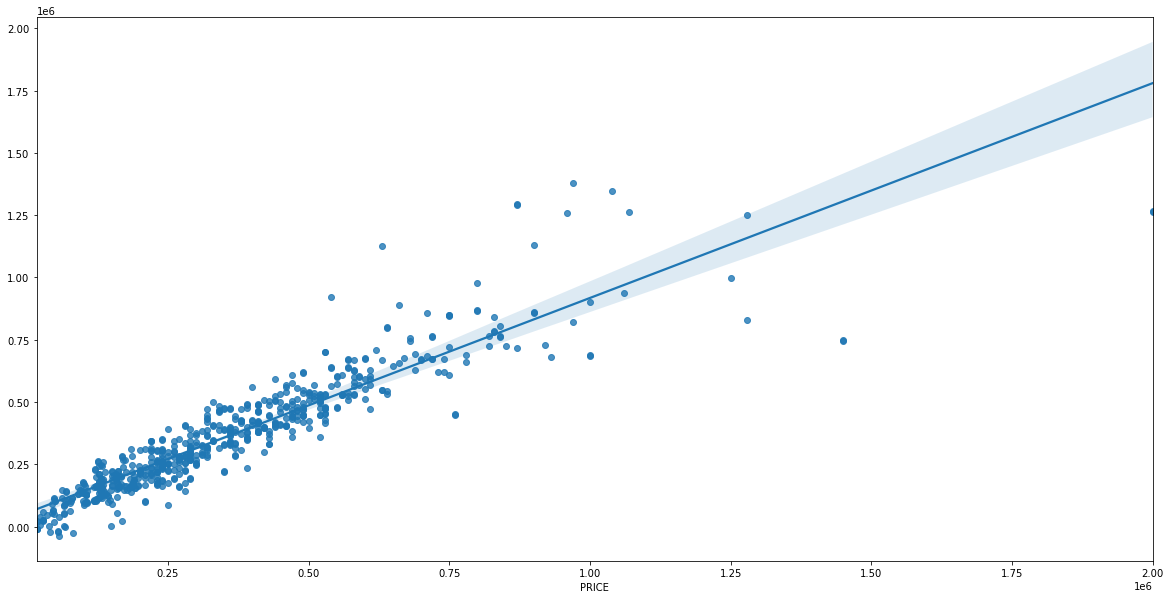

In [113]:
sns.regplot(y_test,lr_prediction)

In [123]:
#
x_train_sm = sm.add_constant(x_train)

x_train_sm = sm.add_constant(x_train)
ls = sm.OLS(y_train,x_train_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     74.42
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          7.94e-311
Time:                        20:57:01   Log-Likelihood:                -12367.
No. Observations:                 951   AIC:                         2.486e+04
Df Residuals:                     886   BIC:                         2.518e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

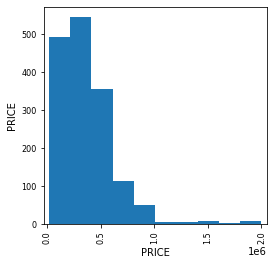

In [120]:
# Visualize the relationships between all measures
_ = pd.plotting.scatter_matrix(r_df_sales, figsize=(4,4))

In [121]:
# Visualize the relationships between all measures
r_df_sales.corr()

,PRICE
PRICE,1.0


In [ ]:
#lets plot the residuals 
plot_scatter

In [133]:
#lets predict average buyers 
avg_buyers
#X = cdn_df3[['GEO', 'Sale type', 'Property characteristics', 'Estimates']]
X_buyers = avg_buyers
X_buyers = pd.get_dummies(data=X, drop_first=True)
X_buyers

,VALUE,"GEO_Bathurst, Census agglomeration (CA)",GEO_British Columbia,"GEO_Campbell River, Census agglomeration (CA)","GEO_Campbellton (New Brunswick part), Census agglomeration (CA) – provincial part","GEO_Cape Breton, Census agglomeration (CA)","GEO_Chilliwack, Census agglomeration (CA)","GEO_Courtenay, Census agglomeration (CA)","GEO_Cranbrook, Census agglomeration (CA)","GEO_Dawson Creek, Census agglomeration (CA)",...,Property characteristics_Other property type,Property characteristics_Period of construction not applicable (vacant land),Property characteristics_Property with multiple residential units,Property characteristics_Row house,Property characteristics_Semi-detached house,Property characteristics_Single-detached house,"Property characteristics_Total, all periods of construction","Property characteristics_Total, all property types",Property characteristics_Unspecified period of construction,Property characteristics_Vacant land
3,1.6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15,1.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21,1.6,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
27,1.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,1.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15981,1.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15987,1.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15993,1.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
Y_buyers = avg_buyers['VALUE']
Y_buyers
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.4, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#make sure these are the right sizes and shape for fitting

(1368, 66)
(912, 66)
(1368,)
(912,)


In [136]:
lr_buyers = LinearRegression()
lr_buyers.fit(x_train,y_train)
print(round(lr_buyers.intercept_))

0.0


In [137]:
coeff_parameter = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
VALUE,1.000000e+00
"GEO_Bathurst, Census agglomeration (CA)",-2.039396e-16
GEO_British Columbia,-2.810583e-17
"GEO_Campbell River, Census agglomeration (CA)",-7.514624e-18
"GEO_Campbellton (New Brunswick part), Census agglomeration (CA) – provincial part",-6.205421e-17
...,...
Property characteristics_Single-detached house,2.986969e-17
"Property characteristics_Total, all periods of construction",-1.002842e-17
"Property characteristics_Total, all property types",6.052939e-17
Property characteristics_Unspecified period of construction,-6.388029e-17


C:\Users\owner\anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


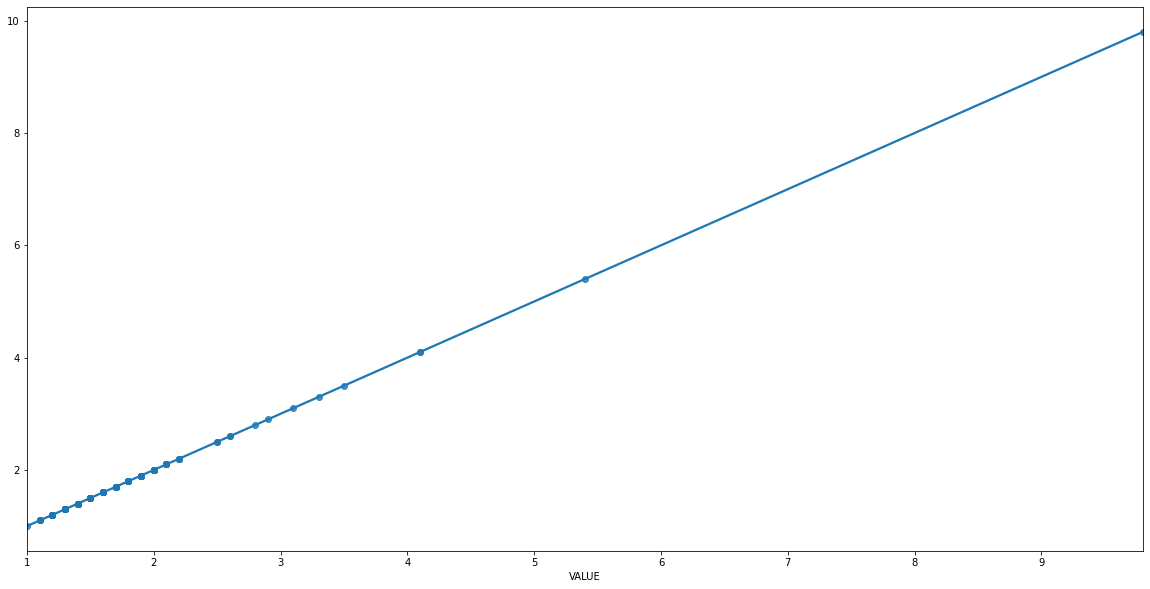

In [138]:
lr_prediction_buyers = lr.predict(x_test)
sns.regplot(y_test,lr_prediction_buyers)

In [139]:
x_train_sm = sm.add_constant(x_train)

x_train_sm = sm.add_constant(x_train)
ls = sm.OLS(y_train,x_train_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.372e+29
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:07:41   Log-Likelihood:                 42998.
No. Observations:                1368   AIC:                        -8.586e+04
Df Residuals:                    1301   BIC:                        -8.551e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [149]:
X_prop = prop_sold
X_prop = pd.get_dummies(data=X_prop, drop_first=True)
Y_prop = prop_sold['VALUE']
Y_prop
x_train,x_test,y_train,y_test = train_test_split(X_prop,Y_prop, test_size=0.4, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
#make sure these are the right sizes and shape for fitting

(1600, 66)
(1067, 66)
(1600,)
(1067,)


In [150]:
lr_prop = LinearRegression()
lr_prop.fit(x_train,y_train)
print(round(lr_prop.intercept_))

-0.0


In [151]:
coeff_parameter = pd.DataFrame(lr_prop.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
VALUE,1.000000e+00
"GEO_Bathurst, Census agglomeration (CA)",-1.918225e-12
GEO_British Columbia,2.429123e-12
"GEO_Campbell River, Census agglomeration (CA)",-1.867504e-12
"GEO_Campbellton (New Brunswick part), Census agglomeration (CA) – provincial part",-3.239169e-12
...,...
Property characteristics_Single-detached house,6.486298e-13
"Property characteristics_Total, all periods of construction",-3.461939e-11
"Property characteristics_Total, all property types",1.542954e-12
Property characteristics_Unspecified period of construction,6.075527e-13


C:\Users\owner\anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


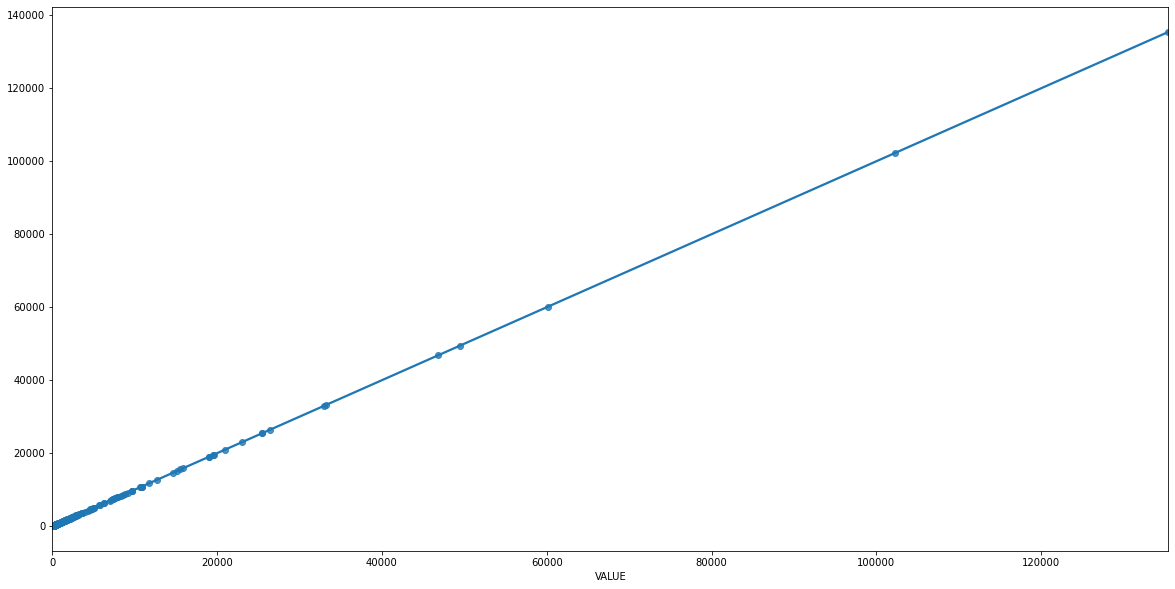

In [152]:
lr_prediction_prop = lr.predict(x_test)
sns.regplot(y_test,lr_prediction_prop)

In [153]:
x_train_sm = sm.add_constant(x_train)

x_train_sm = sm.add_constant(x_train)
ls = sm.OLS(y_train,x_train_sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.379e+31
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:16:01   Log-Likelihood:                 38854.
No. Observations:                1600   AIC:                        -7.757e+04
Df Residuals:                    1533   BIC:                        -7.721e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [ ]:
#lets get all the estimate and values to append 
cdn_df2['Estimates']

In [51]:
r_df_sales.shape
#so we have only 1586 values for avg sales price

(1586, 5)

In [ ]:
#now we have our dataframe but we should include more features from original df from estimates col with avg buyers, etc. as these could
#really help predict what the sale price of the house is, we need to merge these into this df
#let's first extract that cols as a series and then merge into this df with its value aligned 


In [19]:
#values are definitely rounded, not sure why it is called avg other than perhaps it's because there can be more than one sale at once
avg_sale_price['VALUE'].unique()

array([ 200000.,  220000.,  280000.,  250000.,   68000.,  350000.,
        430000.,   62000.,  173000.,  161000.,  210000.,  310000.,
        320000.,  330000.,  390000.,   99000.,  123000.,   28000.,
         41000.,  125000.,   23000.,   84000.,  103000.,  129000.,
        159000.,  182000.,  230000.,  240000.,  132000.,  260000.,
        101000.,  760000.,  120000.,  370000.,  270000.,  300000.,
        380000.,  510000.,  192000.,  160000.,   66000.,  150000.,
        154000.,  176000.,  197000.,  290000.,  122000.,  135000.,
         55000.,  134000.,   38000.,   79000.,  124000.,  180000.,
         70000.,  143000.,  158000.,  127000.,   67000.,   48000.,
        128000.,  140000.,  139000.,  184000.,  107000.,  133000.,
        157000.,  181000.,  167000.,   44000.,  149000.,  156000.,
        148000.,  177000.,  172000.,  168000.,   63000.,   35000.,
        146000.,  137000.,  190000.,   45000.,  131000.,   17700.,
         74000.,   94000.,  104000.,  187000.,   96000.,   560

In [20]:
#luckily all the values look reasonable and we can work with
#now create a new column for avg sale price 
avg_sale_price.shape

(1586, 10)

In [21]:
avg_num_prop_mask = cdn_df3["Estimates"]=="Number of properties sold"
avg_num_prop = cdn_df3[avg_num_prop_mask]
avg_num_prop.head(10)

,REF_DATE,GEO,Sale type,Property characteristics,Estimates,UOM,UOM_ID,COORDINATE,VALUE,DECIMALS
0,2018,Nova Scotia,"Total, all sale types","Total, all property types",Number of properties sold,Number,223,1.1.1.1,25390.0,0
6,2018,Nova Scotia,"Total, all sale types",Single-detached house,Number of properties sold,Number,223,1.1.2.1,16410.0,0
12,2018,Nova Scotia,"Total, all sale types",Semi-detached house,Number of properties sold,Number,223,1.1.3.1,965.0,0
18,2018,Nova Scotia,"Total, all sale types",Row house,Number of properties sold,Number,223,1.1.4.1,290.0,0
24,2018,Nova Scotia,"Total, all sale types",Condominium apartment,Number of properties sold,Number,223,1.1.5.1,980.0,0
30,2018,Nova Scotia,"Total, all sale types",Mobile homes,Number of properties sold,Number,223,1.1.6.1,650.0,0
36,2018,Nova Scotia,"Total, all sale types",Other property type,Number of properties sold,Number,223,1.1.7.1,35.0,0
42,2018,Nova Scotia,"Total, all sale types",Property with multiple residential units,Number of properties sold,Number,223,1.1.8.1,1360.0,0
48,2018,Nova Scotia,"Total, all sale types",Vacant land,Number of properties sold,Number,223,1.1.9.1,4700.0,0
54,2018,Nova Scotia,"Total, all sale types","Total, all periods of construction",Number of properties sold,Number,223,1.1.10.1,25390.0,0


In [22]:
avg_num_prop_kel_mask = avg_num_prop["GEO"]=="Kelowna, Census metropolitan area (CMA)"
avg_num_prop_kel = avg_num_prop[avg_num_prop_kel_mask]
avg_num_prop_kel.head(60)

,REF_DATE,GEO,Sale type,Property characteristics,Estimates,UOM,UOM_ID,COORDINATE,VALUE,DECIMALS
9522,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types","Total, all property types",Number of properties sold,Number,223,27.1.1.1,7120.0,0
9528,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Single-detached house,Number of properties sold,Number,223,27.1.2.1,2870.0,0
9534,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Semi-detached house,Number of properties sold,Number,223,27.1.3.1,190.0,0
9540,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Row house,Number of properties sold,Number,223,27.1.4.1,870.0,0
9546,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Condominium apartment,Number of properties sold,Number,223,27.1.5.1,1955.0,0
9552,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Mobile homes,Number of properties sold,Number,223,27.1.6.1,25.0,0
9558,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Other property type,Number of properties sold,Number,223,27.1.7.1,135.0,0
9564,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Property with multiple residential units,Number of properties sold,Number,223,27.1.8.1,640.0,0
9570,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types",Vacant land,Number of properties sold,Number,223,27.1.9.1,435.0,0
9576,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types","Total, all periods of construction",Number of properties sold,Number,223,27.1.10.1,7120.0,0


In [25]:
prop_type_mask = avg_num_prop_kel["Property characteristics"]=="Total, all property types"
prop_type = avg_num_prop_kel[prop_type_mask]
prop_type.head()

,REF_DATE,GEO,Sale type,Property characteristics,Estimates,UOM,UOM_ID,COORDINATE,VALUE,DECIMALS
9522,2018,"Kelowna, Census metropolitan area (CMA)","Total, all sale types","Total, all property types",Number of properties sold,Number,223,27.1.1.1,7120.0,0
9642,2018,"Kelowna, Census metropolitan area (CMA)",Non-market sale,"Total, all property types",Number of properties sold,Number,223,27.2.1.1,1390.0,0
9762,2018,"Kelowna, Census metropolitan area (CMA)",Market sale,"Total, all property types",Number of properties sold,Number,223,27.3.1.1,5730.0,0


In [26]:
avg_num_buyers_mask = cdn_df3['Estimates']=='Average number of buyers'
avg_num_buyers = cdn_df3[avg_num_buyers_mask]
avg_num_buyers.head()

,REF_DATE,GEO,Sale type,Property characteristics,Estimates,UOM,UOM_ID,COORDINATE,VALUE,DECIMALS
3,2018,Nova Scotia,"Total, all sale types","Total, all property types",Average number of buyers,Number,223,1.1.1.4,1.6,1
9,2018,Nova Scotia,"Total, all sale types",Single-detached house,Average number of buyers,Number,223,1.1.2.4,1.7,1
15,2018,Nova Scotia,"Total, all sale types",Semi-detached house,Average number of buyers,Number,223,1.1.3.4,1.5,1
21,2018,Nova Scotia,"Total, all sale types",Row house,Average number of buyers,Number,223,1.1.4.4,1.6,1
27,2018,Nova Scotia,"Total, all sale types",Condominium apartment,Average number of buyers,Number,223,1.1.5.4,1.5,1


In [31]:
avg_num_buyers["VALUE"].unique()

array([ 1.6,  1.7,  1.5,  1.4,  1.8,  1.1,  1.2,  1.3,  2. ,  1.9,  3. ,
        3.2,  2.1,  2.5,  2.6,  2.2,  2.3,  3.3,  3.1,  3.8,  9.8,  2.9,
        2.7, 19.2,  7.5,  3.5,  2.8,  1. ,  4.1, 10.7,  5.4])

In [28]:
avg_num_buyers["VALUE"].unique()
#cdn_df2.groupby('Estimates')['Estimates'].agg('count')

array([ 1.6,  1.7,  1.5,  1.4,  1.8,  1.1,  1.2,  1.3,  2. ,  1.9,  3. ,
        3.2,  2.1,  2.5,  2.6,  2.2,  2.3,  3.3,  3.1,  3.8,  9.8,  2.9,
        2.7, 19.2,  7.5,  3.5,  2.8,  1. ,  4.1, 10.7,  5.4])

In [68]:
#rent data from: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3410013301 "Canada Mortgage and Housing Corporation, average rents for areas with a population of 10,000 and over"
rent_df = pd.read_csv("C:/Users/owner/Desktop/cpsc599/project/34100133-eng/34100133.csv")
rent_df.head()

,REF_DATE,GEO,DGUID,Type of structure,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Bachelor units,Dollars,81,units,0,v42135513,192.3.1,NaN,..,NaN,NaN,0
1,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,One bedroom units,Dollars,81,units,0,v42135529,192.3.2,NaN,..,NaN,NaN,0
2,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Two bedroom units,Dollars,81,units,0,v42135545,192.3.3,NaN,..,NaN,NaN,0
3,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row and apartment structures of three units an...,Three bedroom units,Dollars,81,units,0,v42135561,192.3.4,NaN,..,NaN,NaN,0
4,1987,"Bay Roberts, Newfoundland and Labrador",2011S0504005,Row structures of three units and over,Bachelor units,Dollars,81,units,0,v42135577,192.2.1,NaN,..,NaN,NaN,0
